![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [7]:
# Datos
# ==============================================================================
from sklearn.datasets import load_diabetes
data = load_diabetes()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos = data1
datos

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [13]:
# Correlación entre columnas numéricas
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
54,s2,s1,0.896663,0.896663
45,s1,s2,0.896663,0.896663
67,s3,s4,-0.738493,0.738493
76,s4,s3,-0.738493,0.738493
57,s2,s4,0.659817,0.659817
75,s4,s2,0.659817,0.659817
78,s4,s5,0.617857,0.617857
87,s5,s4,0.617857,0.617857
74,s4,s1,0.542207,0.542207
47,s1,s4,0.542207,0.542207


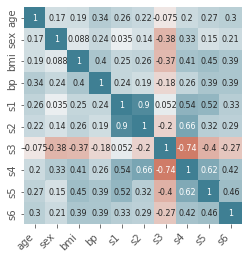

In [14]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

IndexError: ignored

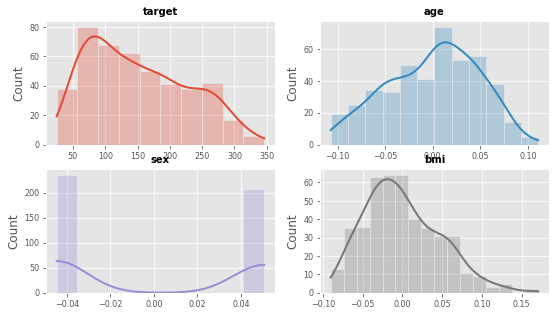

In [17]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

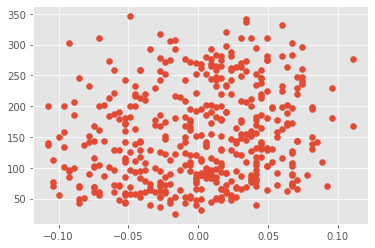

In [19]:
plt.scatter(datos['age'],datos['target'])

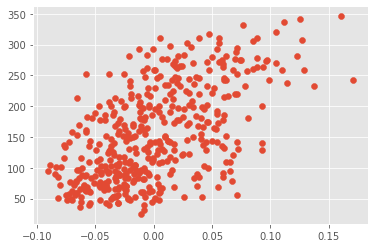

In [21]:
plt.scatter(datos['bmi'],datos['target'])

In [33]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#PONER CODIGO AQUI

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()

print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     38.12
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           7.15e-50
Time:                        17:50:43   Log-Likelihood:                -1905.0
No. Observations:                 353   AIC:                             3832.
Df Residuals:                     342   BIC:                             3875.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.4797      2.892     53.077      0.0

El modelo con todas las variables introducidas como predictores tiene un  R2 de (0.527), es capaz de explicar el 52.7% de ¿¿¿¿¿indice / nivel de diabtes???. 

¿¿¿¿¿¿¿El p-value ( Prob (F-statistic)) del modelo es significativo (7.15e-50) por lo que se puede aceptar que el modelo es mejor que lo esperado por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.??????

Acorde al p-value obtenido para el coeficiente parcial de regresión de age, s1, s2, s3, s4, s6 esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo dichos predictores.

In [35]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina las columnas age,s3,del conjunto de train y test
X_train_2 = X_train.drop(columns = ['age','s3'])
X_test_2 = X_test.drop(columns = ['age','s3'] )

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train_2 = sm.add_constant(X_train_2, prepend=True)
modelo_2  = sm.OLS(endog=y_train, exog=X_train_2,)
modelo_2 = modelo_2.fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.56
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.96e-51
Time:                        17:58:54   Log-Likelihood:                -1905.7
No. Observations:                 353   AIC:                             3829.
Df Residuals:                     344   BIC:                             3864.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.4924      2.889     53.129      0.0

In [36]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina las columnas s2,s4 del conjunto de train y test
X_train_3 = X_train.drop(columns = ['s2','s4'])
X_test_3 = X_test.drop(columns = ['s2','s4'] )

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train_3 = sm.add_constant(X_train_3, prepend=True)
modelo_3  = sm.OLS(endog=y_train, exog=X_train_3,)
modelo_3 = modelo_3.fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     46.85
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.13e-50
Time:                        18:01:53   Log-Likelihood:                -1907.1
No. Observations:                 353   AIC:                             3832.
Df Residuals:                     344   BIC:                             3867.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.5380      2.900     52.941      0.0

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================

#PONER CODIGO AQUI

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");